In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,5)
from dotenv import load_dotenv
import os
# https://github.com/mortada/fredapi
from fredapi import Fred
from datetime import datetime
from matplotlib.dates import date2num

In [2]:
# Load .env environment variables
load_dotenv()

# Set FRED API key and secret
FRED_api_key = os.getenv("FRED")

# Verify that FRED key and secret were correctly loaded
print(f"FRED Key type: " + str(type(FRED_api_key)))

# FRED_api_key
fred = Fred(api_key=FRED_api_key)

FRED Key type: <class 'str'>


In [3]:
# FRED Datasets

# Debt:

us_debt = fred.get_series('GFDEBTN', '1/1/1950').dropna()
us_debt = pd.DataFrame(us_debt)
us_debt = us_debt.rename(columns={0:'Total Debt'})

# Inflation Datasets:

ppi = fred.get_series('PPIACO', '1/1/1950').dropna()
ppi = pd.DataFrame(ppi)
ppi = ppi.rename(columns={0:'Producer Price Index'})

cpi = fred.get_series('CPIAUCSL', '1/1/1950').dropna()
cpi = pd.DataFrame(cpi)
cpi = cpi.rename(columns={0:'Consumer Price Index'})

pce = fred.get_series('PCE', '1/1/1950').dropna()
pce = pd.DataFrame(pce)
pce = pce.rename(columns={0:'Personal Consumption Expenditure'})

pcer = fred.get_series('PCEC96', '1/1/1950').dropna()
pcer = pd.DataFrame(pcer)
pcer = pcer.rename(columns={0:'Real Personal Consumption Expenditure'})

cpi_core = fred.get_series('CPILFESL', '1/1/1950').dropna()
cpi_core = pd.DataFrame(cpi_core)
cpi_core = cpi_core.rename(columns={0:'Consumer Price Index'})

cli_us = fred.get_series('USALOLITONOSTSAM', '1/1/1950').dropna()
cli_us = pd.DataFrame(cli_us)
cli_us = cli_us.rename(columns={0:'Composite Leading Indicator'})

inf_mich = fred.get_series('MICH', '1/1/1978').dropna()
inf_mich = pd.DataFrame(inf_mich)
inf_mich = inf_mich.rename(columns={0:'University of Michigan Inflation Survey'})

inf_exp = fred.get_series('CSINFT02USM460S', '1/1/1978').dropna()
inf_exp = pd.DataFrame(inf_exp)
inf_exp = inf_exp.rename(columns={0:'Consumer Opinion Survey'})

inf_1 = fred.get_series('EXPINF1YR', '1/1/1950').dropna()
inf_1 = pd.DataFrame(inf_1)
inf_1 = inf_1.rename(columns={0:'1 Year Inflation Expectation'})

inf_5 = fred.get_series('EXPINF1YR', '1/1/1950').dropna()
inf_5 = pd.DataFrame(inf_5)
inf_5 = inf_5.rename(columns={0:'5 Year Inflation Expectation'})

tips = fred.get_series('DFII5', '1/2/2003').dropna()
tips = pd.DataFrame(tips)
tips = tips.rename(columns={0:'5-Year TIPS Yields'})

tsy_5yr = fred.get_series('DGS5', '1/2/2003').dropna()
tsy_5yr = pd.DataFrame(tsy_5yr)
tsy_5yr = tsy_5yr.rename(columns={0:'5-Year Treasury Yields'})

fiveyr_breakeven = fred.get_series('T5YIE', '1/2/2003').dropna()
fiveyr_breakeven = pd.DataFrame(fiveyr_breakeven)
fiveyr_breakeven = fiveyr_breakeven.rename(columns={0:'5yr Inflation Breakeven'})

tenyr_breakeven = fred.get_series('T10YIE', '1/2/2003').dropna()
tenyr_breakeven = pd.DataFrame(tenyr_breakeven)
tenyr_breakeven = tenyr_breakeven.rename(columns={0:'10yr Inflation Breakeven'})

thirtyyr_breakeven = fred.get_series('T30YIEM', '1/2/2003').dropna()
thirtyyr_breakeven = pd.DataFrame(thirtyyr_breakeven)
thirtyyr_breakeven = thirtyyr_breakeven.rename(columns={0:'30yr Inflation Breakeven'})

# GDP:

nominal_gdp = fred.get_series('GDP', '1/1/1950').dropna()
nominal_gdp = pd.DataFrame(nominal_gdp)
nominal_gdp = nominal_gdp.rename(columns={0:'Nominal GDP'})

real_gdp = fred.get_series('GDPC1', '1/1/1950').dropna()
real_gdp = pd.DataFrame(real_gdp)
real_gdp = real_gdp.rename(columns={0:'Actual GDP'})

potential_gdp = fred.get_series('GDPPOT', '1/1/1950').dropna()
potential_gdp = pd.DataFrame(potential_gdp)
potential_gdp = potential_gdp.rename(columns={0:'Potential GDP'})

gdp_capita = fred.get_series('A939RX0Q048SBEA', '1/1/1950').dropna()
gdp_capita = pd.DataFrame(gdp_capita)
gdp_capita = gdp_capita.rename(columns={0:'GDP per Capita'})

debt_gdp = fred.get_series('GFDEGDQ188S', '1/1/1950').dropna()
debt_gdp = pd.DataFrame(debt_gdp)
debt_gdp = debt_gdp.rename(columns={0:'Total Debt to GDP'})

# GDP Breakdown:
# Auto:
    
auto_output = fred.get_series('A133RC1Q027SBEA', '1/1/1950').dropna()
auto_output = pd.DataFrame(auto_output)
auto_output = auto_output.rename(columns={0:'Auto Output'})

motor_veh = fred.get_series('A953RC1Q027SBEA', '1/1/1950').dropna()
motor_veh = pd.DataFrame(motor_veh)
motor_veh = motor_veh.rename(columns={0:'Motor Vehicle Output'})

auto_prod = fred.get_series('DAUPSA', '1/1/1950').dropna()
auto_prod = pd.DataFrame(auto_prod)
auto_prod = auto_prod.rename(columns={0:'Auto Production'})

auto_inv = fred.get_series('AUINSA', '1/1/1950').dropna()
auto_inv = pd.DataFrame(auto_inv)
auto_inv = auto_inv.rename(columns={0:'Auto Inventory'})

auto_inv_sale = fred.get_series('AISRSA', '1/1/1950').dropna()
auto_inv_sale = pd.DataFrame(auto_inv_sale)
auto_inv_sale = auto_inv_sale.rename(columns={0:'Auto Inventory to Sales Ratio'})

auto_sale_total = fred.get_series('TOTALSA', '1/1/1950').dropna()
auto_sale_total = pd.DataFrame(auto_sale_total)
auto_sale_total = auto_sale_total.rename(columns={0:'Total Auto Sales'})

# Manufacturing:

ind_prod = fred.get_series('INDPRO', '1/1/1950').dropna()
ind_prod = pd.DataFrame(ind_prod)
ind_prod = ind_prod.rename(columns={0:'Total Industrial Production'})
    
no_tm = fred.get_series('AMTMNO', '1/1/1950').dropna()
no_tm = pd.DataFrame(no_tm)
no_tm = no_tm.rename(columns={0:'Total New Orders'})
    
no_dg = fred.get_series('DGORDER', '1/1/1950').dropna()
no_dg = pd.DataFrame(no_dg)
no_dg = no_dg.rename(columns={0:'New Orders Durable Goods'})
    
no_mch = fred.get_series('A33SNO', '1/1/1950').dropna()
no_mch = pd.DataFrame(no_mch)
no_mch = no_mch.rename(columns={0:'New Orders Machinery'})
    
no_IT = fred.get_series('AITINO', '1/1/1950').dropna()
no_IT  = pd.DataFrame(no_IT)
no_IT  = no_IT.rename(columns={0:'New Orders IT Industry'})
    
no_eac = fred.get_series('A35SNO', '1/1/1950').dropna()
no_eac = pd.DataFrame(no_eac)
no_eac = no_eac.rename(columns={0:'New Orders Electric, App&Comp'})
    
no_mvp = fred.get_series('AMVPNO', '1/1/1950').dropna()
no_mvp = pd.DataFrame(no_mvp)
no_mvp = no_mvp.rename(columns={0:'New Orders Motor Vechile Parts'})
    
goma = fred.get_series('GOMA', '1/1/1950').dropna()
goma = pd.DataFrame(goma)
goma = goma.rename(columns={0:'Gross Output Manufacturing'})

goc = fred.get_series('GOC', '1/1/1950').dropna()
goc = pd.DataFrame(goc)
goc = goc.rename(columns={0:'Gross Output Construction'})

gor = fred.get_series('GOR', '1/1/1950').dropna()
gor = pd.DataFrame(gor)
gor = gor.rename(columns={0:'Gross Output Retail Trade'})

gof = fred.get_series('A2000C1A027NBEA', '1/1/1950').dropna()
gof = pd.DataFrame(gof)
gof = gof.rename(columns={0:'Farm Output'})

# Military:

no_defense = fred.get_series('ADAPNO', '1/1/1950').dropna()
no_defense = pd.DataFrame(no_defense)
no_defense = no_defense.rename(columns={0:'New Orders Defense'})

dgi = fred.get_series('dgi', '1/1/1950').dropna()
dgi = pd.DataFrame(dgi)
dgi = dgi.rename(columns={0:'Federal Defense Investment'})

comp_military = fred.get_series('B4080C1Q027SBEA', '1/1/1950').dropna()
comp_military = pd.DataFrame(comp_military)
comp_military = comp_military.rename(columns={0:'National Defense Compensation'})

# Labor Statistics: 

labor_total = fred.get_series('CLF16OV', '1/1/1950').dropna()
labor_total = pd.DataFrame(labor_total)
labor_total = labor_total.rename(columns={0:'Total Labor Force'})

labor_change = fred.get_series('PRS85006091', '1/1/1950').dropna()
labor_change = pd.DataFrame(labor_change)
labor_change = labor_change.rename(columns={0:'Labor Productivity % Change'})

labor_prod = fred.get_series('OPHNFB', '1/1/1950').dropna()
labor_prod = pd.DataFrame(labor_prod)
labor_prod = labor_prod.rename(columns={0:'Labor Productivity'})

labor_part = fred.get_series('CIVPART', '1/1/1950').dropna()
labor_part= pd.DataFrame(labor_part)
labor_part = labor_part.rename(columns={0:'Labor Participation Rate'})

labor_men = fred.get_series('LNS11300001', '1/1/1950').dropna()
labor_men = pd.DataFrame(labor_men)
labor_men = labor_men.rename(columns={0:'Labor Force Men'})

labor_women = fred.get_series('LNS11300002', '1/1/1950').dropna()
labor_women = pd.DataFrame(labor_women)
labor_women = labor_women.rename(columns={0:'Labor Force Women'})

labor_core = fred.get_series('LNS11300060', '1/1/1950').dropna()
labor_core = pd.DataFrame(labor_core)
labor_core = labor_core.rename(columns={0:'Labor Force 25-54'})

labor_old = fred.get_series('LNS11324230', '1/1/1950').dropna()
labor_old = pd.DataFrame(labor_old)
labor_old = labor_old.rename(columns={0:'Labor Force 54+'})

labor_nlf = fred.get_series('LNS15000000', '1/1/1950').dropna()
labor_nlf = pd.DataFrame(labor_nlf)
labor_nlf = labor_nlf.rename(columns={0:'Not in Labor Force'})

unempl_rate = fred.get_series('UNRATE', '1/1/1980').dropna()
unempl_rate = pd.DataFrame(unempl_rate)
unempl_rate = unempl_rate.rename(columns={0:'Unemployment Rate'})

unempl_level = fred.get_series('UNEMPLOY', '1/1/1950').dropna()
unempl_level = pd.DataFrame(unempl_level)
unempl_level = unempl_level.rename(columns={0:'Unemployment Level'})

unempl_ins = fred.get_series('CCSA', '1/1/1950').dropna()
unempl_ins = pd.DataFrame(unempl_ins)
unempl_ins = unempl_ins.rename(columns={0:'Unemployment Insurance'})

unempl_black = fred.get_series('LNS14000006', '1/1/1950').dropna()
unempl_black = pd.DataFrame(unempl_black)
unempl_black = unempl_black.rename(columns={0:'African American Unemployment Rate'})

unempl_white = fred.get_series('LNS14000003', '1/1/1950').dropna()
unempl_white = pd.DataFrame(unempl_white)
unempl_white = unempl_white.rename(columns={0:'Caucasian Unemployment Rate'})

unempl_hispanic = fred.get_series('LNS14000009', '1/1/1950').dropna()
unempl_hispanic = pd.DataFrame(unempl_hispanic)
unempl_hispanic = unempl_hispanic.rename(columns={0:'Hispanic Unemployment Rate'})

unempl_asian = fred.get_series('LNU04032183', '1/1/1950').dropna()
unempl_asian = pd.DataFrame(unempl_asian)
unempl_asian = unempl_asian.rename(columns={0:'Asian Unemployment Rate'})

unempl_27weeks = fred.get_series('UEMP27OV', '1/1/1950').dropna()
unempl_27weeks = pd.DataFrame(unempl_27weeks)
unempl_27weeks = unempl_27weeks.rename(columns={0:'Unemployment Rate Over 27 Weeks'})

unempl_women = fred.get_series('LNS14000002', '1/1/1950').dropna()
unempl_women = pd.DataFrame(unempl_women)
unempl_women = unempl_women.rename(columns={0:'Unemployment Rate Women'})

unempl_men = fred.get_series('LNS14000001', '1/1/1950').dropna()
unempl_men = pd.DataFrame(unempl_men)
unempl_men = unempl_men.rename(columns={0:'Unemployment Rate Men'})

# Wage Data

gdi = fred.get_series('A4102C1Q027SBEA', '1/1/1950').dropna()
gdi = pd.DataFrame(gdi)
gdi = gdi.rename(columns={0:'Gross Domestic Income'})

min_wage = fred.get_series('FEDMINNFRWG', '1/1/1950').dropna()
min_wage = pd.DataFrame(min_wage)
min_wage = min_wage.rename(columns={0:'Federal Minimum Wage'})

wage_weekly = fred.get_series('LES1252881600Q', '1/1/1950').dropna()
wage_weekly = pd.DataFrame(wage_weekly)
wage_weekly = wage_weekly.rename(columns={0:'Federal Minimum Wage'})

wage_illinois = fred.get_series('STTMINWGIL', '1/1/1950').dropna()
wage_illinois = pd.DataFrame(wage_illinois)
wage_illinois = wage_illinois.rename(columns={0:'Illinois Minimum Wage'})

wage_ohio = fred.get_series('STTMINWGOH', '1/1/1950').dropna()
wage_ohio = pd.DataFrame(wage_ohio)
wage_ohio = wage_ohio.rename(columns={0:'Ohio Minimum Wage'})

wage_michigan = fred.get_series('STTMINWGMI', '1/1/1950').dropna()
wage_michigan = pd.DataFrame(wage_michigan)
wage_michigan = wage_michigan.rename(columns={0:'Michigan Minimum Wage'})

wage_penn = fred.get_series('STTMINWGPA', '1/1/1950').dropna()
wage_penn  = pd.DataFrame(wage_penn)
wage_penn  = wage_penn .rename(columns={0:'Illinois Minimum Wage'})

wage_texas = fred.get_series('STTMINWGTX', '1/1/1950').dropna()
wage_texas = pd.DataFrame(wage_texas)
wage_texas = wage_texas.rename(columns={0:'Texas Minimum Wage'})

wage_nj = fred.get_series('STTMINWGNJ', '1/1/1950').dropna()
wage_nj = pd.DataFrame(wage_nj)
wage_nj = wage_nj.rename(columns={0:'New Jersey Minimum Wage'})

wage_mass = fred.get_series('STTMINWGMA', '1/1/1950').dropna()
wage_mass = pd.DataFrame(wage_mass)
wage_mass = wage_mass.rename(columns={0:'Massachusets Minimum Wage'})

wage_az = fred.get_series('STTMINWGAZ', '1/1/1950').dropna()
wage_az = pd.DataFrame(wage_az)
wage_az = wage_az.rename(columns={0:'Arizona Minimum Wage'})

wage_mn = fred.get_series('STTMINWGMN', '1/1/1950').dropna()
wage_mn = pd.DataFrame(wage_mn)
wage_mn = wage_mn.rename(columns={0:'Minnesota Minimum Wage'})

wage_va = fred.get_series('STTMINWGVA', '1/1/1950').dropna()
wage_va = pd.DataFrame(wage_va)
wage_va = wage_va.rename(columns={0:'Virginia Minimum Wage'})

wage_ark = fred.get_series('STTMINWGIL', '1/1/1950').dropna()
wage_ark = pd.DataFrame(wage_ark)
wage_ark = wage_ark.rename(columns={0:'Arkansas Minimum Wage'})

wage_missouri = fred.get_series('STTMINWGMO', '1/1/1950').dropna()
wage_missouri = pd.DataFrame(wage_missouri)
wage_missouri = wage_missouri.rename(columns={0:'Missouri Minimum Wage'})

# Household Data:

hh_total = fred.get_series('TTLHH', '1/1/1950').dropna()
hh_total = pd.DataFrame(hh_total)
hh_total = hh_total.rename(columns={0:'USA Total Households'})

hhdebt_gdp = fred.get_series('HDTGPDUSQ163N', '1/1/1950').dropna()
hhdebt_gdp = pd.DataFrame(hhdebt_gdp)
hhdebt_gdp = hhdebt_gdp.rename(columns={0:'USA Household Debt to GDP'})

hh_income = fred.get_series('W388RC1A027NBEA', '1/1/1950').dropna()
hh_income = pd.DataFrame(hh_income)
hh_income = hh_income.rename(columns={0:'USA Household Disposable Income'})

hh_savings = fred.get_series('W398RC1A027NBEA', '1/1/1950').dropna()
hh_savings = pd.DataFrame(hh_savings)
hh_savings = hh_savings.rename(columns={0:'USA Household Savings'})

hh_networth = fred.get_series('BOGZ1FL192090005Q', '1/1/1950').dropna()
hh_networth = pd.DataFrame(hh_networth)
hh_networth = hh_networth.rename(columns={0:'USA Household Networth'})

hh_re_equity = fred.get_series('OEHRENWBSHNO', '1/1/1950').dropna()
hh_re_equity = pd.DataFrame(hh_re_equity)
hh_re_equity = hh_re_equity.rename(columns={0:'USA Household RE Equity'})

home_black = fred.get_series('BOAAAHORUSQ156N', '1/1/1950').dropna()
home_black = pd.DataFrame(home_black)
home_black = home_black.rename(columns={0:'Home Ownership: African Americans'})

home_hispanic = fred.get_series('HOLHORUSQ156N', '1/1/1950').dropna()
home_hispanic = pd.DataFrame(home_hispanic)
home_hispanic = home_hispanic.rename(columns={0:'Home Ownership: Hispanics'})

home_white = fred.get_series('NHWAHORUSQ156N', '1/1/1950').dropna()
home_white = pd.DataFrame(home_white)
home_white = home_white.rename(columns={0:'Home Ownership: Caucasians'})

home_asian = fred.get_series('ANHPIHORUSQ156N', '1/1/1950').dropna()
home_asian = pd.DataFrame(home_asian)
home_asian = home_asian.rename(columns={0:'Home Ownership: Asians'})

home_national = fred.get_series('RHORUSQ156N', '1/1/1950').dropna()
home_national = pd.DataFrame(home_national)
home_national = home_national.rename(columns={0:'Home Ownership: National Average'})

cc_delinq = fred.get_series('DRCCLACBS', '1/1/1950').dropna()
cc_delinq = pd.DataFrame(cc_delinq)
cc_delinq = cc_delinq.rename(columns={0:'Home Ownership: National Average'})

# M2 Datasets:

m2 = fred.get_series('M2SL', '1/1/1950').dropna()
m2 = pd.DataFrame(m2)
m2 = m2.rename(columns={0:'US M2'})

m2r = fred.get_series('M2REAL', '1/1/1950').dropna()
m2r = pd.DataFrame(m2r)
m2r = m2r.rename(columns={0:'US M2 Real'})

m2v = fred.get_series('M2V', '1/1/1950').dropna()
m2v = pd.DataFrame(m2v)
m2v = m2v.rename(columns={0:'US M2 Velocity'})

ffr = fred.get_series('FEDFUNDS', '1/1/1950').dropna()
ffr = pd.DataFrame(ffr)
ffr = ffr.rename(columns={0:'Federal Funds Rate'})


# Fixed Income Markets:

fiveswap = fred.get_series('T5YIFR', '1/1/1980').dropna()
fiveswap = pd.DataFrame(fiveswap)
fiveswap = fiveswap.rename(columns={0:'5-Year Forward IRS'})

high_yield = fred.get_series('BAMLH0A0HYM2EY', '1/1/1980').dropna()
high_yield = pd.DataFrame(high_yield)
high_yield = high_yield.rename(columns={0:'Junk Bond Corp Yields'})

ig_yield = fred.get_series('BAMLC0A0CMEY', '1/1/1980').dropna()
ig_yield = pd.DataFrame(ig_yield)
ig_yield = ig_yield.rename(columns={0:'IG Corp Yields'})

# Sentiment 

cci = fred.get_series('CSCICP03USM665S', '1/1/1950').dropna()
cci = pd.DataFrame(cci)
cci = cci.rename(columns={0:'Consumer Confidence Index'})

bci = fred.get_series('BSCICP03USM665S', '1/1/1950').dropna()
bci = pd.DataFrame(bci)
bci = bci.rename(columns={0:'Business Confidence Index'})

um_cci = fred.get_series('UMCSENT', '1/1/1950').dropna()
um_cci = pd.DataFrame(um_cci)
um_cci = um_cci.rename(columns={0:'University of Michigan Consumer Confidence'})

china_cci = fred.get_series('CSCICP03CNM665S', '1/1/1990').dropna()
china_cci = pd.DataFrame(china_cci)
china_cci = china_cci.rename(columns={0:'China Consumer Confidence'})

china_bci = fred.get_series('BSCICP03CNM665S', '1/1/1990').dropna()
china_bci = pd.DataFrame(china_bci)
china_bci = china_bci.rename(columns={0:'China Business Confidence'})

russia_bci = fred.get_series('CSCICP03EZM665S', '1/1/1950').dropna()
russia_bci = pd.DataFrame(russia_bci)
russia_bci = russia_bci.rename(columns={0:'Russia Business Confidence'})

euro_cci = fred.get_series('BSCICP03RUM665S', '1/1/1950').dropna()
euro_cci = pd.DataFrame(euro_cci)
euro_cci = euro_cci.rename(columns={0:'Eurozone Consumer Confidence'})

euro_bci = fred.get_series('BSCURT02EZQ160S', '1/1/1950').dropna()
euro_bci = pd.DataFrame(euro_bci)
euro_bci = euro_bci.rename(columns={0:'Eurozone Business Confidence'})

vix = fred.get_series('VIXCLS', '1/1/1950').dropna()
vix = pd.DataFrame(vix)
vix = vix.rename(columns={0:'CBOE VIX'})

# Plastics

ppi_plastic = fred.get_series('PCU325211325211', '1/1/1980').dropna()
ppi_plastic = pd.DataFrame(ppi_plastic)
ppi_plastic= ppi_plastic.rename(columns={0:'PPI Plastics and Resins Index'})

# Oil

wti = fred.get_series('DCOILWTICO', '1/1/1980').dropna()
wti = pd.DataFrame(wti)
wti = wti.rename(columns={0:'WTI Oil'})

# Crypto and Major US Indices:

btc_price = fred.get_series('CBBTCUSD', '1/2/2003').dropna()
btc_price = pd.DataFrame(btc_price)
btc_price = btc_price.rename(columns={0:'Bitcoin Price'})

eth_price = fred.get_series('CBETHUSD', '1/2/2003').dropna()
eth_price = pd.DataFrame(eth_price)
eth_price = eth_price.rename(columns={0:'Ethereum Price'})

sp500_price = fred.get_series('sp500', '1/2/2003').dropna()
sp500_price = pd.DataFrame(sp500_price)
sp500_price = sp500_price.rename(columns={0:'SP500 Price'})

nasdaq_price = fred.get_series('NASDAQCOM', '1/2/2003').dropna()
nasdaq_price = pd.DataFrame(nasdaq_price)
nasdaq_price = nasdaq_price.rename(columns={0:'Nasdaq Price'})

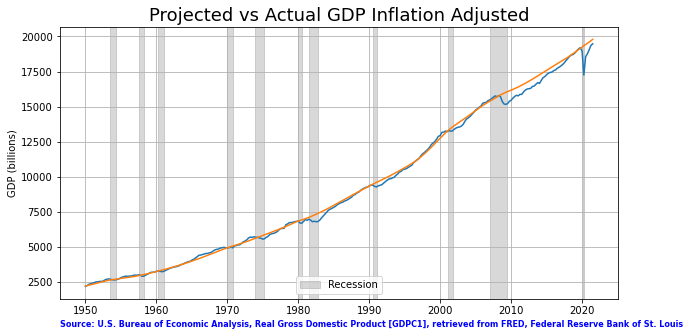

In [4]:
# Graph Potential GDP vs Actual GDP
gdp_spread_df = pd.concat([real_gdp, potential_gdp], axis = 'columns', join = 'inner')

# Plot shaded regions
ax = gdp_spread_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(gdp_spread_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot chart, title, lablels
ax.set_ylabel('GDP (billions)', color = 'black', fontsize=10, loc='center')
ax.set_xlabel('Source: U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Projected vs Actual GDP Inflation Adjusted', color = 'black', fontsize=18, loc='center')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
gdp_spread_df.to_csv('xls/GDP vs Projected GDP.csv')
plt.savefig('pdf/GDP vs Projected GDP.pdf')



In [5]:
real_gdp.head()

,Actual GDP
1950-01-01,2186.365
1950-04-01,2253.045
1950-07-01,2340.112
1950-10-01,2384.920
1951-01-01,2417.311


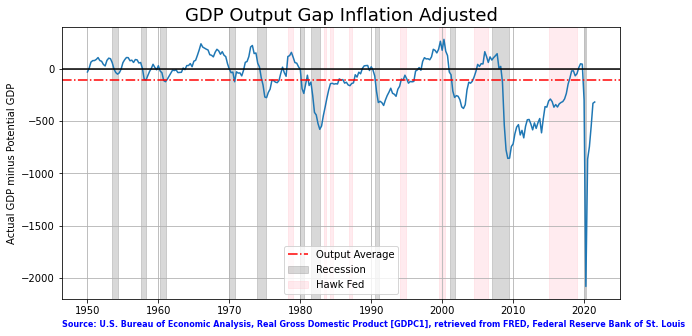

In [8]:
# GDP Output Gap Calculation
gdp_spread_df = pd.concat([potential_gdp, real_gdp], axis="columns", join="inner")
gdp_spread_df['Output Gap'] = gdp_spread_df['Actual GDP'] - gdp_spread_df['Potential GDP']
gdp_spread_df.drop(columns=['Actual GDP', 'Potential GDP'], inplace=True)

# Plot shaded regions
ax = gdp_spread_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(gdp_spread_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3)
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
#           label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1978,4,1)), date2num(datetime(1978,12,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1983,5,1)), date2num(datetime(1983,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1984,3,1)), date2num(datetime(1984,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1986,12,1)), date2num(datetime(1987,5,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(1994,2,4)), date2num(datetime(1994,11,15)), 
           label = "Hawk Fed", color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1999,6,30)), date2num(datetime(1999,11,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2000,2,2)), date2num(datetime(2000,5,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2004,6,30)), date2num(datetime(2006,6,29)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) #Operation Twist
ax.axvspan(date2num(datetime(2015,1,1)), date2num(datetime(2019,1,1)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot chart, title, lablels

ax.set_ylabel('Actual GDP minus Potential GDP')
ax.set_xlabel('Source: U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('GDP Output Gap Inflation Adjusted', color = 'black', size=18, loc= 'center')

# Horizontal 
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=-110, color='red', linestyle='-.', label = 'Output Average')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')


# Output to CSV and PDF
gdp_spread_df.to_csv('xls/GDP Output Spread.csv')
plt.savefig('pdf/GDP Output Gap.pdf')

#source for recession:  https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States

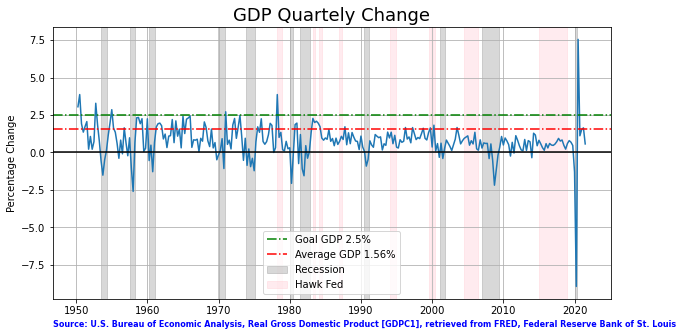

In [9]:
# GDP Percentage Change
real_gdp_change = real_gdp.pct_change().dropna()*100

# Plot shaded regions
ax = real_gdp_change
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(real_gdp_change)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3)
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
#           label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1978,4,1)), date2num(datetime(1978,12,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1983,5,1)), date2num(datetime(1983,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1984,3,1)), date2num(datetime(1984,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1986,12,1)), date2num(datetime(1987,5,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(1994,2,4)), date2num(datetime(1994,11,15)), 
           label = "Hawk Fed", color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1999,6,30)), date2num(datetime(1999,11,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2000,2,2)), date2num(datetime(2000,5,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2004,6,30)), date2num(datetime(2006,6,29)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) #Operation Twist
ax.axvspan(date2num(datetime(2015,1,1)), date2num(datetime(2019,1,1)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot chart, title, lablels
ax.set_ylabel('Percentage Change')
ax.set_xlabel('Source: U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('GDP Quartely Change', color = 'black', size=18, loc='center')

# Horizontal 
plt.axhline(y=2.5, color='green', linestyle='-.', label = 'Goal GDP 2.5%')
plt.axhline(y=1.56, color='red', linestyle='-.', label = 'Average GDP 1.56%')
plt.axhline(y=0, color='black', linestyle='-')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
real_gdp_change.to_csv('xls/GDP Change.csv')
plt.savefig('pdf/GDP Change.pdf')

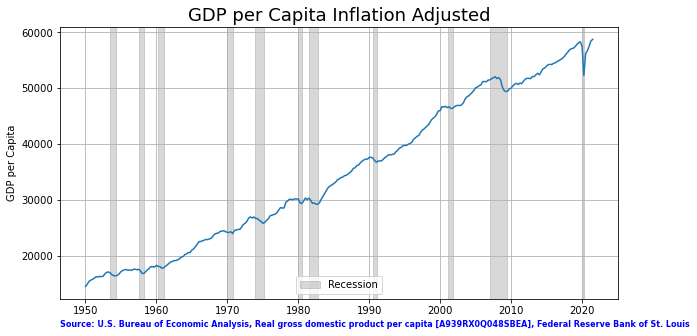

In [10]:
# GDP per Capita 

#Plot shaded regions
ax = gdp_capita
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(gdp_capita)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1971,8,15)), date2num(datetime(1971,10,1)), 
           #label="Nixon Ending Gold Standard",color="gold", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('GDP per Capita')
ax.set_xlabel('Source: U.S. Bureau of Economic Analysis, Real gross domestic product per capita [A939RX0Q048SBEA], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('GDP per Capita Inflation Adjusted', size=18)
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
gdp_capita.to_csv('xls/GDP per Capita.csv')
plt.savefig('pdf/Real GDP per Capita.pdf')

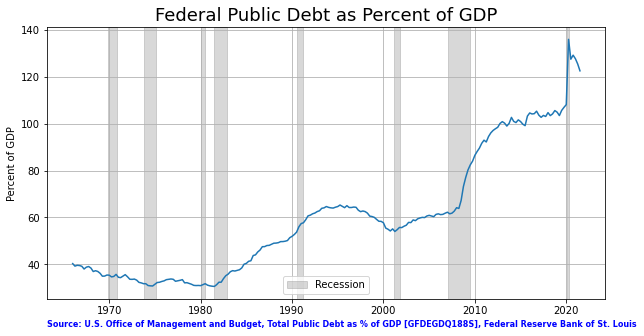

In [11]:
# Debt-to-GDP Ratio

#Plot shaded regions
ax = debt_gdp
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(debt_gdp)


ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           label = "Recession", color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1971,8,15)), date2num(datetime(1971,10,1)), 
           #label="Nixon Ending Gold Standard",color="gold", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percent of GDP')
ax.set_xlabel('Source: U.S. Office of Management and Budget, Total Public Debt as % of GDP [GFDEGDQ188S], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Federal Public Debt as Percent of GDP', size=18)
plt.grid()

# Plot legend location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
debt_gdp.to_csv('xls/Debt to GDP Ratio.csv')
plt.savefig('pdf/Debt to GDP Ratio.pdf')

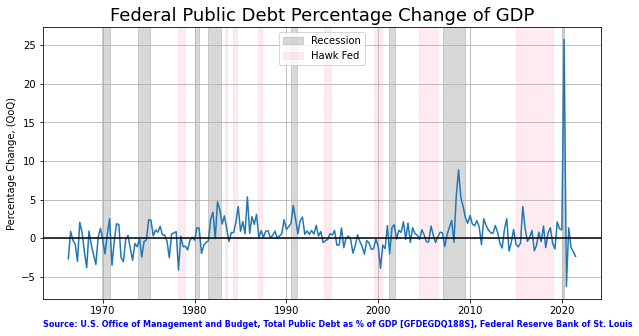

In [12]:
# Debt-to-GDP Change
debt_gdp_change = debt_gdp.pct_change().dropna()*100

#Plot Shaded Regions
ax = debt_gdp_change
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(debt_gdp_change)

ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           label = "Recession", color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1971,8,15)), date2num(datetime(1971,10,1)), 
           #label="Nixon Ending Gold Standard",color="gold", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1978,4,1)), date2num(datetime(1978,12,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1983,5,1)), date2num(datetime(1983,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1984,3,1)), date2num(datetime(1984,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1986,12,1)), date2num(datetime(1987,5,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(1994,2,4)), date2num(datetime(1994,11,15)), 
           label = "Hawk Fed", color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1999,6,30)), date2num(datetime(1999,11,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2000,2,2)), date2num(datetime(2000,5,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2004,6,30)), date2num(datetime(2006,6,29)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2015,1,1)), date2num(datetime(2019,1,1)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines

ax.set_ylabel('Percentage Change, (QoQ)')
ax.set_xlabel('Source: U.S. Office of Management and Budget, Total Public Debt as % of GDP [GFDEGDQ188S], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Federal Public Debt Percentage Change of GDP', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.grid()

# Legend Location
ax.legend(loc='upper center', fontsize = 'medium')

# Output to CSV and PDF
debt_gdp_change.to_csv('xls/Debt to GDP Change.csv')
plt.savefig('pdf/Debt to GDP Change.pdf')

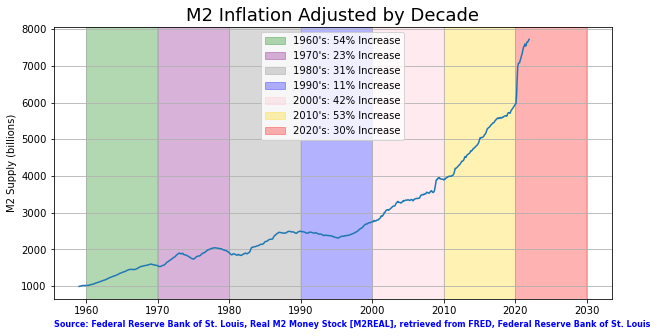

In [13]:
# M2 Inflation Adjusted 

# Plot Recessions
ax = m2r
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(m2r)

ax.axvspan(date2num(datetime(1960,1,1)), date2num(datetime(1969,12,1)), 
           label = "1960's: 54% Increase", color="green", alpha=0.3)
ax.axvspan(date2num(datetime(1970,1,1)), date2num(datetime(1979,12,1)), 
           label = "1970's: 23% Increase", color="purple", alpha=0.3)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1989,12,1)), 
           label = "1980's: 31% Increase", color="grey", alpha=0.3)
ax.axvspan(date2num(datetime(1990,1,1)), date2num(datetime(1999,12,1)), 
           label = "1990's: 11% Increase", color="blue", alpha=0.3)         
ax.axvspan(date2num(datetime(2000,1,1)), date2num(datetime(2009,12,1)), 
           label = "2000's: 42% Increase",color="pink", alpha=0.3)       
ax.axvspan(date2num(datetime(2010,1,1)), date2num(datetime(2019,12,1)), 
           label = "2010's: 53% Increase",color="gold", alpha=0.3)         
ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2029,12,1)), 
           label = "2020's: 30% Increase",color="red", alpha=0.3) 

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('M2 Supply (billions)')
ax.set_xlabel('Source: Federal Reserve Bank of St. Louis, Real M2 Money Stock [M2REAL], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('M2 Inflation Adjusted by Decade', size=18)
plt.grid()

# Legend Location
ax.legend(loc='upper center', fontsize = 'medium')

# Output to CSV and PDF
m2r.to_csv('xls/m2real.csv')
plt.savefig('pdf/m2real.pdf')

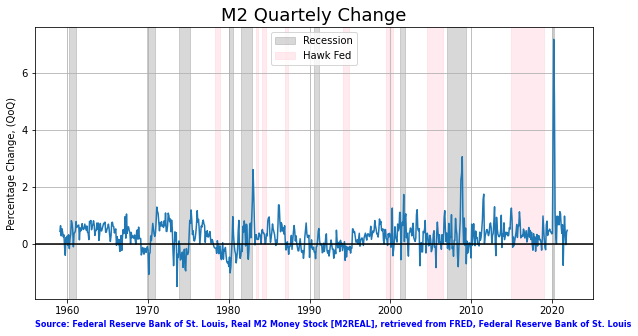

In [14]:
# M2 Percentage Change
m2r_change_df = m2r.pct_change().dropna()*100

# Plot Recessions
ax = m2r_change_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(m2r_change_df)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recession", color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1971,8,15)), date2num(datetime(1971,10,1)), 
           #label="Nixon Ending Gold Standard",color="gold", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1978,4,1)), date2num(datetime(1978,12,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1983,5,1)), date2num(datetime(1983,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1984,3,1)), date2num(datetime(1984,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1986,12,1)), date2num(datetime(1987,5,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(1994,2,4)), date2num(datetime(1994,11,15)), 
           label = "Hawk Fed", color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1999,6,30)), date2num(datetime(1999,11,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2000,2,2)), date2num(datetime(2000,5,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2004,6,30)), date2num(datetime(2006,6,29)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) #Operation Twist
ax.axvspan(date2num(datetime(2015,1,1)), date2num(datetime(2019,1,1)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (QoQ)')
ax.set_xlabel('Source: Federal Reserve Bank of St. Louis, Real M2 Money Stock [M2REAL], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('M2 Quartely Change', size=18)

# Horizontal 
plt.axhline(y=0, color='black', linestyle='-')
plt.grid()

# Legend Location
ax.legend(loc='upper center', fontsize = 'medium')

# Output to CSV and PDF
m2r_change_df.to_csv('xls/m2change.csv')
plt.savefig('pdf/m2change.pdf')

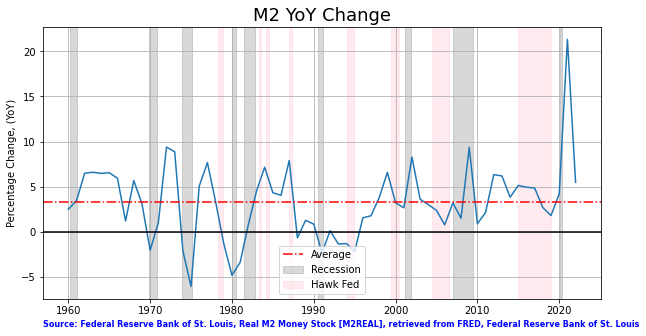

In [15]:
# M2 Percentage Change YoY
m2r_YoY_df = m2r_change_df.resample('A').sum().dropna()

# Plot Recessions
ax = m2r_YoY_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(m2r_YoY_df)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recession", color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1971,8,15)), date2num(datetime(1971,10,1)), 
           #label="Nixon Ending Gold Standard",color="gold", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1978,4,1)), date2num(datetime(1978,12,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1983,5,1)), date2num(datetime(1983,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1984,3,1)), date2num(datetime(1984,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1986,12,1)), date2num(datetime(1987,5,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(1994,2,4)), date2num(datetime(1994,11,15)), 
           label = "Hawk Fed", color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1999,6,30)), date2num(datetime(1999,11,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2000,2,2)), date2num(datetime(2000,5,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2004,6,30)), date2num(datetime(2006,6,29)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) #Operation Twist
ax.axvspan(date2num(datetime(2015,1,1)), date2num(datetime(2019,1,1)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (YoY)')
ax.set_xlabel('Source: Federal Reserve Bank of St. Louis, Real M2 Money Stock [M2REAL], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('M2 YoY Change', size=18)

# Horizontal 
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=3.27, color='red', linestyle='-.', label = 'Average')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
m2r_YoY_df.to_csv('xls/m2 YoY change.csv')
plt.savefig('pdf/m2 YoY change.pdf')

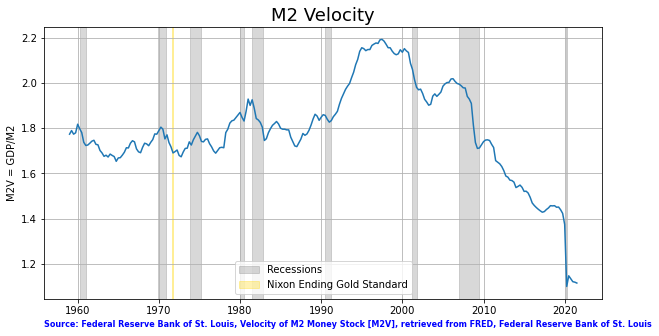

In [16]:
# M2 Velocity

# Plot Shaded Regions
ax = m2v
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(m2v)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recessions", color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
ax.axvspan(date2num(datetime(1971,8,15)), date2num(datetime(1971,10,1)), 
           label="Nixon Ending Gold Standard",color="gold", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('M2V = GDP/M2')
ax.set_xlabel('Source: Federal Reserve Bank of St. Louis, Velocity of M2 Money Stock [M2V], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('M2 Velocity', size=18)
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
m2v.to_csv('xls/m2v.csv')
plt.savefig('pdf/m2v.pdf')


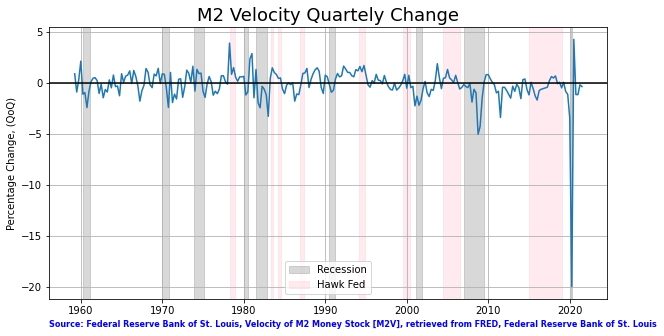

In [17]:
# M2 Velocity Change

m2v_change_df = m2v.pct_change().dropna()*100

# Plot Shaded Regions
ax = m2v_change_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(m2v_change_df)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recession", color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1971,8,15)), date2num(datetime(1971,10,1)), 
           #label="Nixon Ending Gold Standard",color="gold", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1978,4,1)), date2num(datetime(1978,12,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1983,5,1)), date2num(datetime(1983,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1984,3,1)), date2num(datetime(1984,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1986,12,1)), date2num(datetime(1987,5,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(1994,2,4)), date2num(datetime(1994,11,15)), 
           label = "Hawk Fed", color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1999,6,30)), date2num(datetime(1999,11,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2000,2,2)), date2num(datetime(2000,5,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2004,6,30)), date2num(datetime(2006,6,29)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) #Operation Twist 
ax.axvspan(date2num(datetime(2015,1,1)), date2num(datetime(2019,1,1)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession


# Plot Legend, Title's and Horizontal lines

ax.set_ylabel('Percentage Change, (QoQ)')
ax.set_xlabel('Source: Federal Reserve Bank of St. Louis, Velocity of M2 Money Stock [M2V], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('M2 Velocity Quartely Change', size=18)

# Horizontal 
plt.axhline(y=0, color='black', linestyle='-')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
m2v_change_df.to_csv('xls/m2v change.csv')
plt.savefig('pdf/m2v change.pdf')

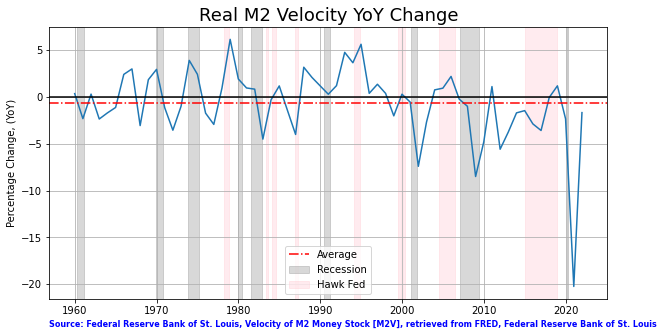

In [18]:
# M2V Percentage Change YoY
m2v_YoY_df = m2v_change_df.resample('A').sum().dropna()

# Plot 
ax = m2v_YoY_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(m2v_YoY_df)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recession", color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1971,8,15)), date2num(datetime(1971,10,1)), 
#           label="Nixon Ending Gold Standard",color="gold", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1978,4,1)), date2num(datetime(1978,12,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1983,5,1)), date2num(datetime(1983,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1984,3,1)), date2num(datetime(1984,8,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1986,12,1)), date2num(datetime(1987,5,1)), 
           color="pink", alpha=0.3) #Hawk Fed
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(1994,2,4)), date2num(datetime(1994,11,15)), 
           label = "Hawk Fed", color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1999,6,30)), date2num(datetime(1999,11,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2000,2,2)), date2num(datetime(2000,5,16)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2004,6,30)), date2num(datetime(2006,6,29)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) #Operation Twist 
ax.axvspan(date2num(datetime(2015,1,1)), date2num(datetime(2019,1,1)), 
           color="pink", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (YoY)')
ax.set_xlabel('Source: Federal Reserve Bank of St. Louis, Velocity of M2 Money Stock [M2V], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Real M2 Velocity YoY Change', size=18)

# Horizontal 
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=-.67, color='red', linestyle='-.', label='Average')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
m2v_YoY_df.to_csv('xls/m2v YoY.csv')
plt.savefig('pdf/m2v YoY.pdf')

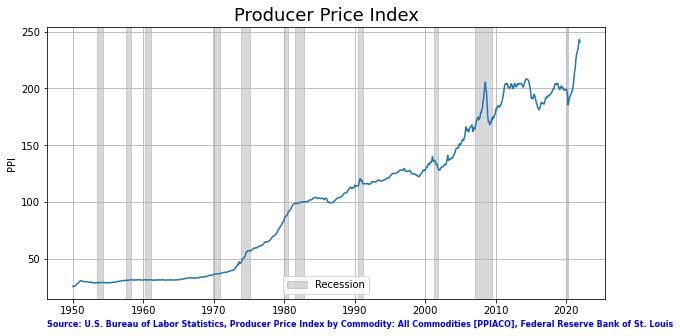

In [19]:
# Producer Price Index

# Plot Shaded Regions
ax = ppi
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ppi)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('PPI')
ax.set_xlabel('Source: U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: All Commodities [PPIACO], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Producer Price Index', size=18)
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
ppi.to_csv('xls/ppi.csv')
plt.savefig('pdf/ppi.pdf')

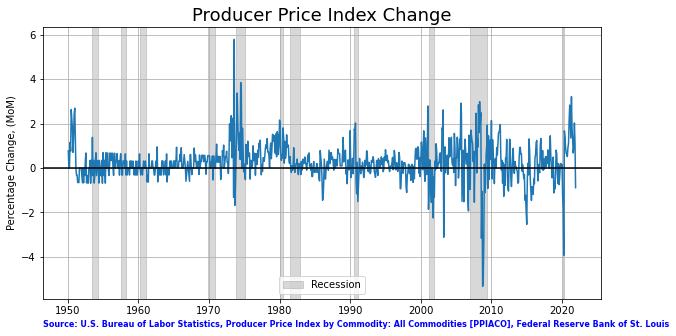

In [20]:
# Producer Price Index

ppi_change_df = ppi.pct_change().dropna()*100

# Plot Shaded Regions
ax = ppi_change_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ppi_change_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (MoM)')
ax.set_xlabel('Source: U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: All Commodities [PPIACO], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Producer Price Index Change', size=18)

# Horizontal 
plt.axhline(y=0, color='black', linestyle='-')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
ppi_change_df.to_csv('xls/ppichange.csv')
plt.savefig('pdf/ppichange.pdf')

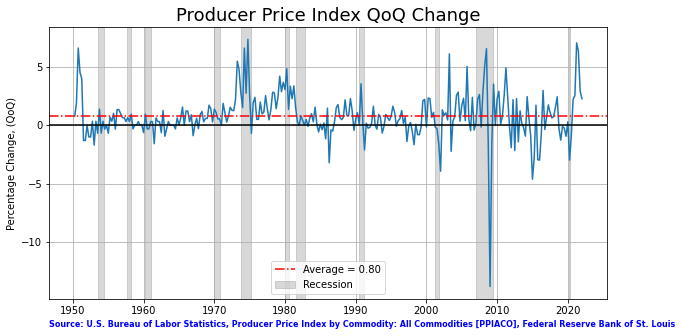

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Producer Price Index Change QoQ
ppi_QoQ_df = ppi_change_df.resample('Q').sum().dropna()

# Plot Shaded Regions
ax = ppi_QoQ_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ppi_QoQ_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
           #label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
           #color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (QoQ)')
ax.set_xlabel('Source: U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: All Commodities [PPIACO], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Producer Price Index QoQ Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=.8, color='red', linestyle='-.', label = 'Average = 0.80')
ax.get_xticklabels()[1::2]
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
ppi_QoQ_df.to_csv('xls/ppi QoQ.csv')
plt.savefig('pdf/ppi QoQ.pdf')

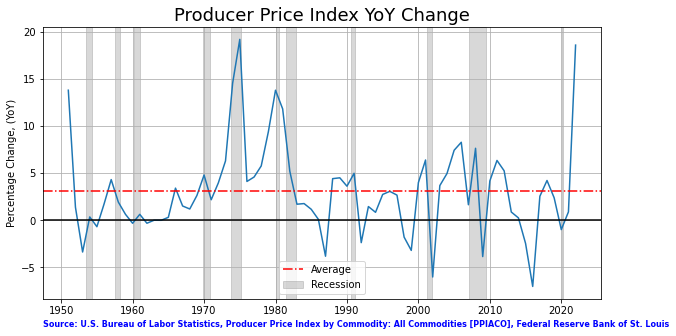

In [22]:
# Producer Price Index Change YoY
ppi_YoY_df = ppi_change_df.resample('A').sum().dropna()
#ppi_YoY_df = ppi_change_df.groupby(ppi_change_df.index.year).sum().dropna()

# Plot
ax = ppi_YoY_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ppi_YoY_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (YoY)')
ax.set_xlabel('Source: U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: All Commodities [PPIACO], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Producer Price Index YoY Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=3.16, color='red', linestyle='-.', label = 'Average')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
ppi_YoY_df.to_csv('xls/ppi YoY.csv')
plt.savefig('pdf/ppi YoY.pdf')

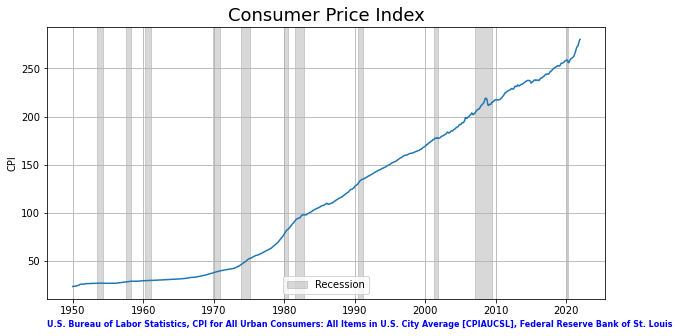

In [23]:
# Consumer Price Index

# Plot Recessions
ax = cpi
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(cpi)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession


# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('CPI')
ax.set_xlabel('U.S. Bureau of Labor Statistics, CPI for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Consumer Price Index', size=18)
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
cpi.to_csv('xls/cpi.csv')
plt.savefig('pdf/cpi.pdf')

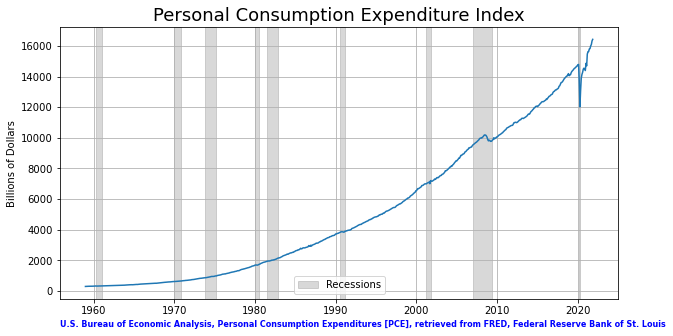

In [24]:
# PCE - Fed index for inflation

# Plot Shaded Regions
ax = pce
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(pce)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recessions", color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Billions of Dollars')
ax.set_xlabel('U.S. Bureau of Economic Analysis, Personal Consumption Expenditures [PCE], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Personal Consumption Expenditure Index', size=18)
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
pce.to_csv('xls/pce.csv')
plt.savefig('pdf/pce.pdf')

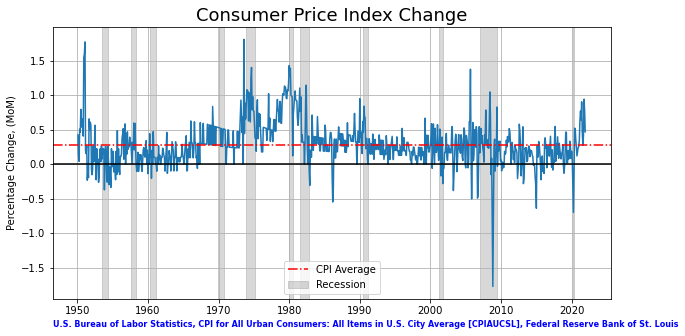

In [25]:
# CPI change

cpi_change_df = cpi.pct_change().dropna()*100
pce_change_df = pce.pct_change().dropna()*100

# Plot Recessions
ax = cpi_change_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(cpi_change_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#          color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (MoM)')
ax.set_xlabel('U.S. Bureau of Labor Statistics, CPI for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Consumer Price Index Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=.28, color='red', linestyle='-.', label = "CPI Average")
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
cpi_change_df.to_csv('xls/cpichange.csv')
plt.savefig('pdf/cpichange.pdf')

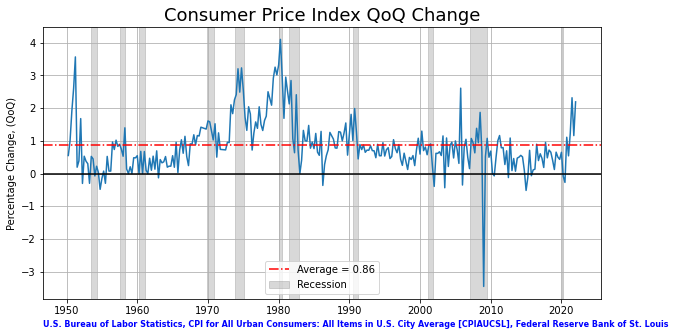

In [26]:
# Consumer Price Index QoQ Change
cpi_change_df = cpi.pct_change().dropna()*100
cpi_QoQ_df = cpi_change_df.resample('Q').sum().dropna()

# Plot Recessions
ax = cpi_QoQ_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(cpi_QoQ_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (QoQ)')
ax.set_xlabel('U.S. Bureau of Labor Statistics, CPI for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Consumer Price Index QoQ Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=.86, color='red', linestyle='-.', label = 'Average = 0.86')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF

cpi_QoQ_df.to_csv('xls/cpi QoQ.csv')
plt.savefig('pdf/cpi QoQ.pdf')

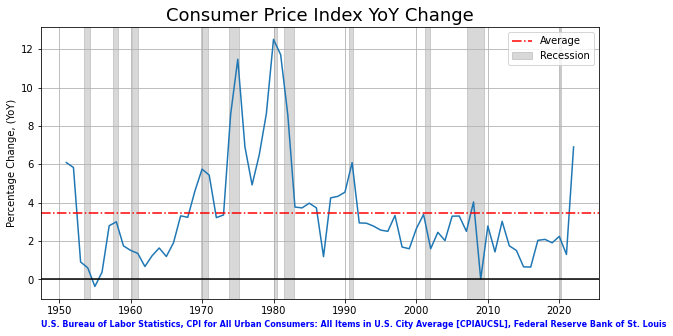

In [27]:
from pandas.tseries.offsets import BYearEnd


# Consumer Price Index Change 
cpi_change_df = cpi.pct_change().dropna()*100
cpi_YoY_df = cpi_change_df.groupby(cpi_change_df.index.year).sum().dropna()

# Reformatted index to be compatible with datetime 
start = cpi_YoY_df.index[0]
end = cpi_YoY_df.index[-1]

end = datetime(end,12,31) + BYearEnd(1)
rng = pd.date_range(start=str(start), end=end, freq='Y')
cpi_YoY_df.index = rng

# Plot Recessions
ax = cpi_YoY_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(cpi_YoY_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (YoY)')
ax.set_xlabel('U.S. Bureau of Labor Statistics, CPI for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Consumer Price Index YoY Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=3.44, color='red', linestyle='-.', label = 'Average')
plt.grid()

# Legend Location
ax.legend(loc='upper right', fontsize = 'medium')

# Output to CSV and PDF

cpi_YoY_df.to_csv('xls/cpi YoY.csv')
plt.savefig('pdf/cpi YoY.pdf')

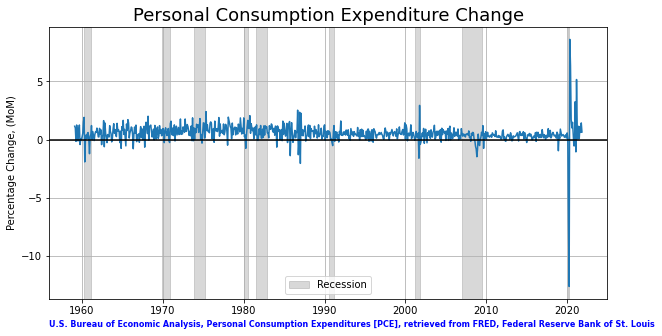

In [28]:
# PCE

# Plot Recessions
ax = pce_change_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(pce_change_df)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recession", color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (MoM)')
ax.set_xlabel('U.S. Bureau of Economic Analysis, Personal Consumption Expenditures [PCE], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Personal Consumption Expenditure Change', size=18)

# Horizontal 
plt.axhline(y=0, color='black', linestyle='-')
#plt.axhline(y=.28, color='red', linestyle='-.', label = "PCD Average")
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
pce_change_df.to_csv('xls/pcechange.csv')
plt.savefig('pdf/pcechange.pdf')

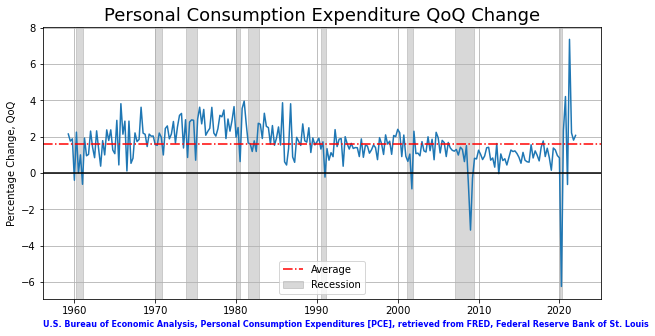

In [29]:
# PCE Change QoQ
pce_change_df = pce.pct_change().dropna()*100
pce_QoQ_df = pce_change_df.resample('Q').sum().dropna()

# Plot Recessions
ax = pce_QoQ_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(pce_QoQ_df)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recession", color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, QoQ')
ax.set_xlabel('U.S. Bureau of Economic Analysis, Personal Consumption Expenditures [PCE], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Personal Consumption Expenditure QoQ Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1.6, color='red', linestyle='-.', label = 'Average')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')


# Output to CSV and PDF
pce_QoQ_df.to_csv('xls/pce QoQ.csv')
plt.savefig('pdf/pce QoQ.pdf')

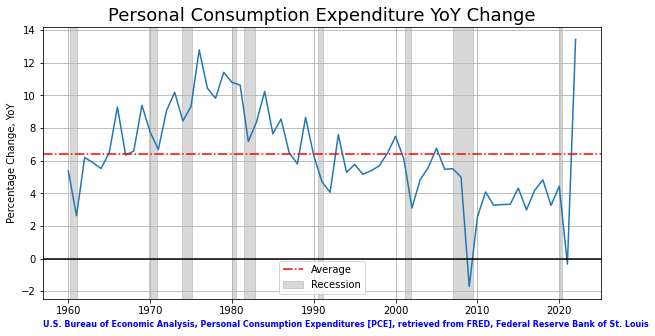

In [30]:
#from pandas.tseries.offsets import BYearEnd

# PCE Change YoY
pce_change_df = pce.pct_change().dropna()*100
pce_YoY_df = pce_change_df.resample('A').sum().dropna()

# Reformatted index to be compatible with datetime 
#start = pce_YoY_df.index[0]
#end = pce_YoY_df.index[-1]

#end = datetime(end,12,31) + BYearEnd(1)
#rng = pd.date_range(start=str(start), end=end, freq='Y')
#pce_YoY_df.index = rng

# Plot Recessions
ax = pce_YoY_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(pce_YoY_df)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "Recession", color="grey", alpha=0.3) #hawk fed from rising inflation
#ax.axvspan(date2num(datetime(1961,6,1)), date2num(datetime(1965,6,1)), 
#           label = "FOMC: Operation Twist", color="purple", alpha=0.3) #Fed flattening of yield curve selling short term buying long term debt
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
#ax.axvspan(date2num(datetime(2011,9,1)), date2num(datetime(2012,12,1)), 
#           color="purple", alpha=0.3) # Operation Twist
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, YoY')
ax.set_xlabel('U.S. Bureau of Economic Analysis, Personal Consumption Expenditures [PCE], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Personal Consumption Expenditure YoY Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=6.4, color='red', linestyle='-.', label = 'Average')
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')


# Output to CSV and PDF
pce_YoY_df.to_csv('xls/pce YoY.csv')
plt.savefig('pdf/pce YoY.pdf')

In [31]:
pcer_change = pcer.pct_change().dropna()

pcer_QoQ_df = pce_change_df.resample('Q').sum().dropna()
pcer_QoQ_df.head()




,Personal Consumption Expenditure
1959-03-31,2.144709
1959-06-30,1.753648
1959-09-30,1.878704
1959-12-31,-0.400853
1960-03-31,2.248427


In [32]:
pce_QoQ_df = pce_change_df.resample('Q').sum().dropna()
pce_QoQ_df.head(8)

pce_A_df = pce_change_df.resample('A').sum().dropna()
pce_A_df.head()

,Personal Consumption Expenditure
1959-12-31,5.376208
1960-12-31,2.629467
1961-12-31,6.197947
1962-12-31,5.879972
1963-12-31,5.520553


In [33]:
pce_YoY_df = pce_change_df.groupby(pce_change_df.index.year).sum().dropna()
pce_YoY_df.head()

,Personal Consumption Expenditure
1959,5.376208
1960,2.629467
1961,6.197947
1962,5.879972
1963,5.520553


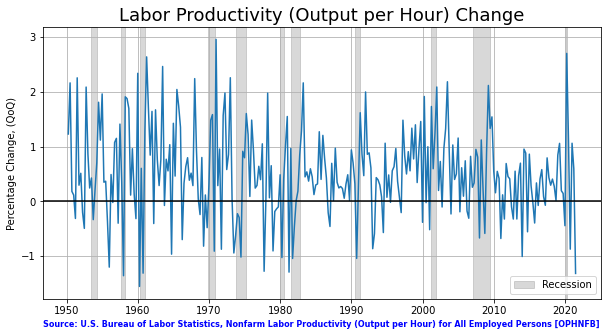

In [34]:
# Labor study:
labor_change = labor_prod.pct_change().dropna()*100

# Plot Recessions
ax = labor_change
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(labor_change)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, (QoQ)')
ax.set_xlabel('Source: U.S. Bureau of Labor Statistics, Nonfarm Labor Productivity (Output per Hour) for All Employed Persons [OPHNFB]', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Labor Productivity (Output per Hour) Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
#plt.axhline(y=2.13, color='red', linestyle='-.', label = "Average")
plt.grid()

# Legend Locator
ax.legend(loc='lower right', fontsize = 'medium')

# Output to CSV and PDF
labor_change.to_csv('xls/laborchange.csv')
plt.savefig('pdf/laborchange.pdf')



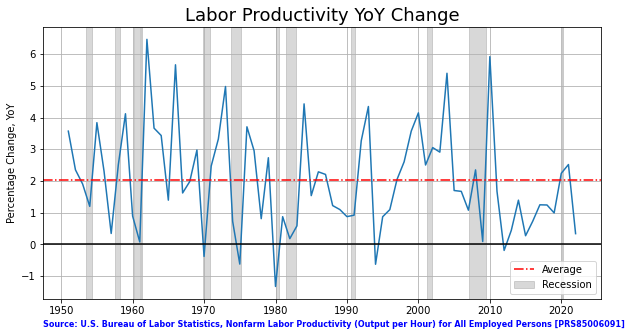

In [35]:
from pandas.tseries.offsets import BYearEnd

# Labor Study YoY
labor_change = labor_prod.pct_change().dropna()*100
labor_YoY_df = labor_change.resample('A').sum().dropna()

# Reformatted index to be compatible with datetime 
#start = labor_YoY_df.index[0]
#end = labor_YoY_df.index[-1]

#end = datetime(end,12,31) + BYearEnd(1)
#rng = pd.date_range(start=str(start), end=end, freq='Y')
#labor_YoY_df.index = rng

# Plot Recessions
ax = labor_YoY_df
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(labor_YoY_df)

ax.axvspan(date2num(datetime(1953,7,1)), date2num(datetime(1954,5,1)), 
           label="Recession",color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1957,8,1)), date2num(datetime(1958,4,1)), 
           color="grey", alpha=0.3) #Hawkish Fed
ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1961,2,17)), date2num(datetime(1961,4,1)), 
           color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
#ax.axvspan(date2num(datetime(1973,10,1)), date2num(datetime(1974,3,1)), 
           #label="OPEC Oil Embargo", color="blue", alpha=0.3) #OPEC Oil Embargo
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percentage Change, YoY')
ax.set_xlabel('Source: U.S. Bureau of Labor Statistics, Nonfarm Labor Productivity (Output per Hour) for All Employed Persons [PRS85006091]', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Labor Productivity YoY Change', size=18)

# Horizontal
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=2.04, color='red', linestyle='-.', label = 'Average')
plt.grid()

# Legend Location
ax.legend(loc='lower right', fontsize = 'medium')

# Output to CSV and PDF
labor_YoY_df.to_csv('xls/labor YoY.csv')
plt.savefig('pdf/labor YoY.pdf')

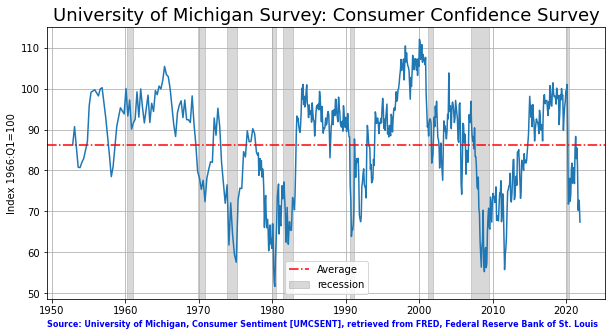

In [36]:
# University of Michigan Consumer Sentiment

# Plot Recessions
ax = um_cci
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(um_cci)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "recession", color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Index 1966:Q1=100')
ax.set_xlabel('Source: University of Michigan, Consumer Sentiment [UMCSENT], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('University of Michigan Survey: Consumer Confidence Survey', size=18)

# Horizontal
plt.axhline(y=86.3, color='red', linestyle='-.', label = "Average")
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
um_cci.to_csv('xls/umcci.csv')
plt.savefig('pdf/umcci.pdf')

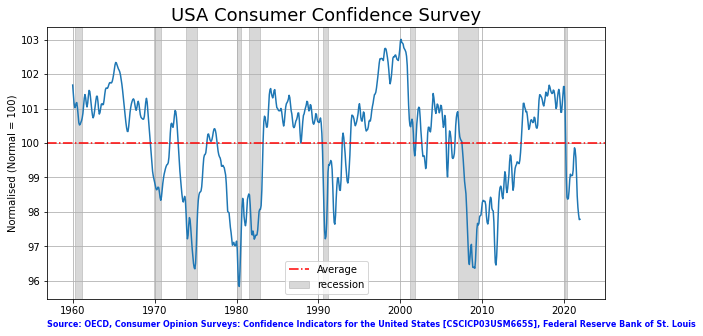

In [37]:
# Plot Recessions
ax = cci
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(cci)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "recession", color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Normalised (Normal = 100)')
ax.set_xlabel('Source: OECD, Consumer Opinion Surveys: Confidence Indicators for the United States [CSCICP03USM665S], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('USA Consumer Confidence Survey', size=18)

# Horizontal
plt.axhline(y=100, color='red', linestyle='-.', label = "Average")
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
cci.to_csv('xls/cci.csv')
plt.savefig('pdf/cci.pdf')

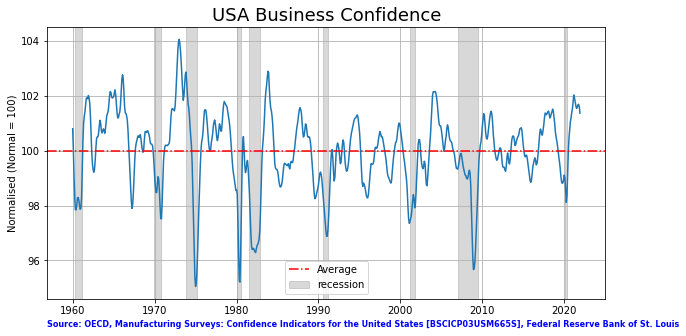

In [38]:
# Business Sentiment

# Plot Recessions
ax = bci
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(bci)

ax.axvspan(date2num(datetime(1960,4,1)), date2num(datetime(1961,2,1)), 
           label = "recession", color="grey", alpha=0.3) #hawk fed from rising inflation
ax.axvspan(date2num(datetime(1969,12,1)), date2num(datetime(1970,11,1)), 
           color="grey", alpha=0.3) #Fed reducing budget deficits from Vietnam War
ax.axvspan(date2num(datetime(1973,11,1)), date2num(datetime(1975,3,1)), 
           color="grey", alpha=0.3) #Stock Market Crash (OPEC 4x oil increase, stagflation in US)
ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Normalised (Normal = 100)')
ax.set_xlabel('Source: OECD, Manufacturing Surveys: Confidence Indicators for the United States [BSCICP03USM665S], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('USA Business Confidence', size=18)

# Horizontal
plt.axhline(y=100, color='red', linestyle='-.', label = "Average")
plt.grid()

# Legend Location
ax.legend(loc='lower center', fontsize = 'medium')

# Output to CSV and PDF
bci.to_csv('xls/bci.csv')
plt.savefig('pdf/bci.pdf')



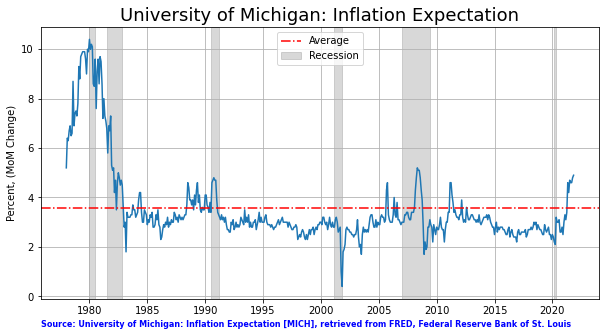

In [39]:
# Inflation Sentiment

# Plot Recessions
ax = inf_mich
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(inf_mich)

ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           label = 'Recession',color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Percent, (MoM Change)')
ax.set_xlabel('Source: University of Michigan: Inflation Expectation [MICH], retrieved from FRED, Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('University of Michigan: Inflation Expectation', size=18)

# Horizontal
plt.axhline(y=3.56, color='red', linestyle='-.', label = "Average")
plt.grid()

# Legend Location
ax.legend(loc='upper center', fontsize = 'medium')

# Output to CSV and PDF
inf_mich.to_csv('xls/um_infl.csv')
plt.savefig('pdf/um_infl.pdf')


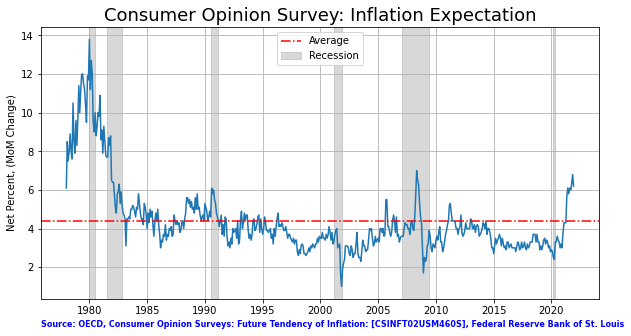

In [40]:
# Inflation Sentiment

# Plot Recessions
ax = inf_exp 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(inf_exp )

ax.axvspan(date2num(datetime(1980,1,1)), date2num(datetime(1980,7,1)), 
           label = 'Recession',color="grey", alpha=0.3) #Inflation crisis of 1970s hawkish fed caused recession
ax.axvspan(date2num(datetime(1981,7,1)), date2num(datetime(1982,11,1)), 
           color="grey", alpha=0.3) #Energy Recession (Iranian Revolution of 1979 caused oil price spike)
ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Net Percent, (MoM Change)')
ax.set_xlabel('Source: OECD, Consumer Opinion Surveys: Future Tendency of Inflation: [CSINFT02USM460S], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('Consumer Opinion Survey: Inflation Expectation', size=18)

# Horizontal
plt.axhline(y=4.41, color='red', linestyle='-.', label = "Average")
plt.grid()

# Legend Location
ax.legend(loc='upper center', fontsize = 'medium')

# Output to CSV and PDF
inf_exp.to_csv('xls/oecd_infl.csv')
plt.savefig('pdf/oecd_infl.pdf')

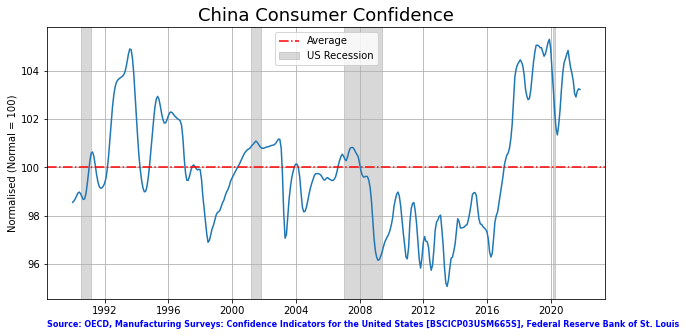

In [41]:
# China Consumer Sentiment

# Plot Recessions
ax = china_cci
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(china_cci)

ax.axvspan(date2num(datetime(1990,7,1)), date2num(datetime(1991,3,1)), 
           label = 'US Recession', color="grey", alpha=0.3) #1990 Oil Shock
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,1)), 
           color="grey", alpha=0.3) #Dotcom Recession
ax.axvspan(date2num(datetime(2007,1,12)), date2num(datetime(2009,6,1)), 
           color="grey", alpha=0.3) #Housing Recession
ax.axvspan(date2num(datetime(2020,2,15)), date2num(datetime(2020,4,15)), 
           color="grey", alpha=0.3) #Pandemic Recession

# Plot Legend, Title's and Horizontal lines
ax.set_ylabel('Normalised (Normal = 100)')
ax.set_xlabel('Source: OECD, Manufacturing Surveys: Confidence Indicators for the United States [BSCICP03USM665S], Federal Reserve Bank of St. Louis', color = 'blue', fontweight = 'bold', fontsize=8, loc='left')
ax.set_title('China Consumer Confidence', size=18)

# Horizontal
plt.axhline(y=100, color='red', linestyle='-.', label = "Average")
plt.grid()

# Legend Location
ax.legend(loc='upper center', fontsize = 'medium')

# Output to CSV and PDF
china_cci.to_csv('xls/china_cci.csv')
plt.savefig('pdf/china_cci.pdf')

In [42]:
from PyPDF2 import PdfFileMerger

pdfs = ['pdf/GDP vs Projected GDP.pdf','pdf/GDP Output Gap.pdf','pdf/GDP Change.pdf','pdf/Real GDP per Capita.pdf','pdf/Debt to GDP Ratio.pdf',
        'pdf/Debt to GDP Change.pdf']

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("pdf/Econometrics - GDP.pdf")
merger.close()

In [43]:
from PyPDF2 import PdfFileMerger

pdfs = ['pdf/m2real.pdf','pdf/m2change.pdf','pdf/m2 YoY change.pdf', 'pdf/m2v.pdf','pdf/m2v change.pdf', 
        'pdf/m2v YoY.pdf']

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("pdf/Econometrics Study - Money Supply.pdf")
merger.close()

In [44]:
from PyPDF2 import PdfFileMerger

pdfs = ['pdf/um_infl.pdf', 'pdf/oecd_infl.pdf','pdf/ppi.pdf','pdf/ppi QoQ.pdf', 'pdf/cpi.pdf','pdf/cpi QoQ.pdf','pdf/pce.pdf',
        'pdf/pce QoQ.pdf', 'pdf/laborchange.pdf', 'pdf/labor YoY.pdf']

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("pdf/Econometrics Study - Inflation.pdf")
merger.close()

In [45]:
from PyPDF2 import PdfFileMerger

pdfs = ['pdf/umcci.pdf','pdf/cci.pdf','pdf/bci.pdf', 'pdf/um_infl.pdf', 'pdf/oecd_infl.pdf']

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("pdf/Econometrics Study - Sentiment.pdf")
merger.close()